In [ ]:
# •	Import Sequential from keras.layers, to initialize our neural network model as a sequential network.
# •	Import Convolution2D from keras.layers, this is to perform the convolution operation
# •	Import MaxPooling2D from keras.layers, which is used for pooling operation.
# •	Import Flatten from keras.layers, which is used for Flattening.
# •	Import Dense from Keras API from keras.layers, which is used to perform the full connection of the neural network
# •	Import matplotlib library to plot the result graph. 

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt


# Initializing the CNN
classifier  = Sequential()

In [ ]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Step1: Convolution- creating feature map
# By using sequential class object, we added a convolution layer by using the “Conv2D” function. The Conv2D function takes 4 arguments,
# 1.	The Number of filters i.e. 32 here
# 2.	The Shape each filter is going to be i.e. 3x3 here
# 3.	The input shape and the type of image (RGB or Black and White) of each image i.e. the input image our CNN is going to be taking is of a 64x64 resolution and “3” stands for RGB, which is a color image.
# 4.	The activation function we want to use, here ‘relu’ stands for a rectifier function.

classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [ ]:
# step2: Pooling- reducing the size of mat.
# By using sequential class object, we added a pooling layer.
# Here we are taking a 2x2 matrix because we’ll have minimum pixel loss and get a precise region where the feature is located.
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
classifier.add(Convolution2D(32,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Step3: Flattening single vector.
# We’ve used flatten function on “classifier” object which is already holding pooled image pixels and they need to be flattened. It doesn’t require any parameter.

classifier.add(Flatten())

In [ ]:
# step4: Full connection
# Dense is the function to add a fully connected layer, 
# 1.	The Units takes the number of nodes that should be present in this hidden layer. i.e. We are using a power of 2 that’s 128. 
# 2.	The activation function we want to use, here ‘relu’ stands for a rectifier function.
# 3.	The final layer contains only one node, and we will be using a sigmoid activation function for the final layer.

classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
# compiling all
# Now at last we will use compile function on the sequential object which takes 3 parameters,
# 1.	Optimizer parameter is to choose the stochastic gradient descent algorithm.
# 2.	Loss parameter is to choose the loss function.
# 3.	Finally, the metrics parameter is to choose the performance metric.

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# fitting the CNN to the image
#  Import Data Generator using keras.preprocessing library for the synthesizing part.
# Also, to prepare the training set as well as the test test set of images from structured directories. 
# i.e. All the images inside the ‘cats’ folder will be considered as cats.


from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Pothole_Image_Data/train',
        target_size=(64, 64),
        batch_size=10,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Pothole_Image_Data/test',
        target_size=(64, 64),
        batch_size=10,
        class_mode='binary')

Found 704 images belonging to 2 classes.
Found 154 images belonging to 2 classes.


In [ ]:
# To fit the data to our model we are using fit_generator function on the object which takes 5 arguments,
# 1.	The training set object. i.e. here training_set
# 2.	The “steps_per_epoch” holds the number of training images. i.e. the number of images in training folde.
# 3.	The epoch is a single step in training a neural network.
# 4.	The test set object. i.e. here test_set

history = classifier.fit_generator(training_set,epochs = 10,validation_data = test_set, validation_steps = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
71/71 [==============================] - 54s 548ms/step - loss: 0.5066 - accuracy: 0.8097 - val_loss: 1.0945 - val_accuracy: 0.5400
Epoch 2/10
71/71 [==============================] - 38s 540ms/step - loss: 0.4019 - accuracy: 0.8381 - val_loss: 0.5607 - val_accuracy: 0.7200
Epoch 3/10
71/71 [==============================] - 39s 546ms/step - loss: 0.1474 - accuracy: 0.9560 - val_loss: 0.2224 - val_accuracy: 0.9100
Epoch 4/10
71/71 [==============================] - 39s 545ms/step - loss: 0.0840 - accuracy: 0.9730 - val_loss: 0.7220 - val_accuracy: 0.8000
Epoch 5/10
71/71 [==============================] - 39s 549ms/step - loss: 0.0700 - accuracy: 0.9801 - val_loss: 0.3421 - val_accuracy: 0.8900
Epoch 6/10
71/71 [==============================] - 39s 545ms/step - loss: 0.0905 - accuracy: 0.9673 - val_loss: 0.4253 - val_accuracy: 0.8500
Epoch 7/10
71/71 [==============================] - 37s 530ms/step - loss: 0.0592 - accuracy: 0.9830 - val_loss: 0.2537 - val_accuracy: 0.9200

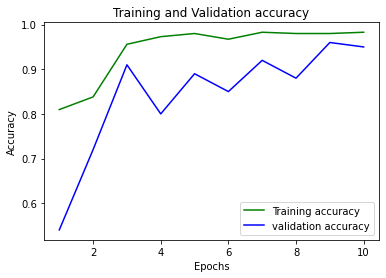

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

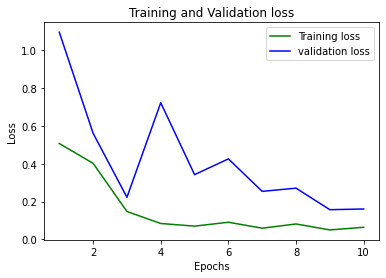

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()